In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import chardet as cdt
import numpy as np
%matplotlib inline

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Analise Exploratoria

##### Visualização Nota Matemática

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lucaskenjis\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


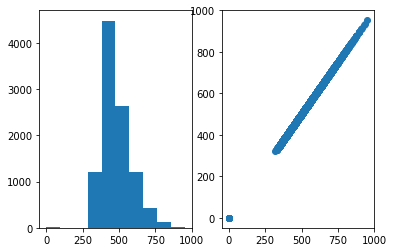

In [3]:
plt.subplot(1, 2, 1)
plt.hist(x=train.NU_NOTA_MT)
plt.subplot(1, 2, 2)
plt.scatter(y=train.NU_NOTA_MT,x=train.NU_NOTA_MT)

##### Visualização Nota Linguagens e Códigos

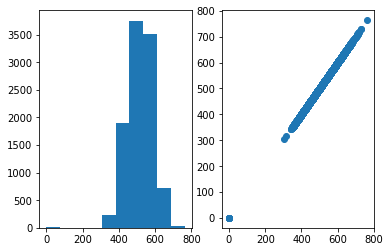

In [4]:
plt.subplot(1, 2, 1)
plt.hist(x=train.NU_NOTA_LC)
plt.subplot(1, 2, 2)
plt.scatter(y=train.NU_NOTA_LC,x=train.NU_NOTA_LC)

##### Visualização Nota Ciências da Natureza

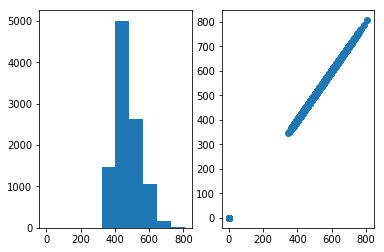

In [5]:
plt.subplot(1, 2, 1)
plt.hist(x=train.NU_NOTA_CN)
plt.subplot(1, 2, 2)
plt.scatter(y=train.NU_NOTA_CN,x=train.NU_NOTA_CN)

##### Visualização Nota Ciências Humanas

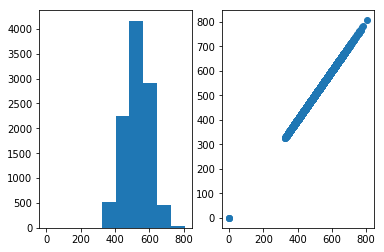

In [6]:
plt.subplot(1, 2, 1)
plt.hist(x=train.NU_NOTA_CH)
plt.subplot(1, 2, 2)
plt.scatter(y=train.NU_NOTA_CH,x=train.NU_NOTA_CH)

##### Visualização Nota Redação

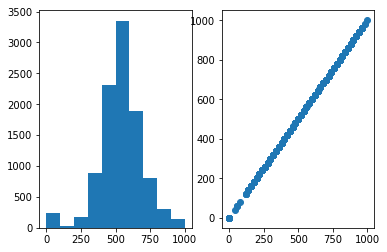

In [7]:
plt.subplot(1, 2, 1)
plt.hist(x=train.NU_NOTA_REDACAO)
plt.subplot(1, 2, 2)
plt.scatter(y=train.NU_NOTA_REDACAO,x=train.NU_NOTA_REDACAO)

### Limpeza
    1. Drop 'Unnamed: 0'
    2. Remover dos dados de traino as features que não estão nos dados de teste
    3. Remover colunas com alto indice de missing values
    4. Remover colunas codigo de residencia, inscrição e Discalculia
    5. Ajustar features qualitativas e quantitativas

#### 1.

In [3]:
train = train.drop(['Unnamed: 0'],axis=1)

##### 2.

In [4]:
test.columns
features = ['NU_NOTA_MT','NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']

In [5]:
train = train[features]

#### 3.

In [7]:
train = train.drop(['TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO','Q027'],axis=1)
test = test.drop(['TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO','Q027'],axis=1)

#### 4.

In [8]:
train = train.drop(['NU_INSCRICAO','CO_UF_RESIDENCIA','IN_DISCALCULIA'],axis=1)

In [9]:
train.columns

Index(['NU_NOTA_MT', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q047'],
      dtype='object')

#### 5.

In [10]:
features_f = ['NU_IDADE','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_COMP1', 
                  'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4','NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

features_c = ['SG_UF_RESIDENCIA','TP_SEXO','TP_COR_RACA','TP_NACIONALIDADE', 'TP_ST_CONCLUSAO','TP_ANO_CONCLUIU',
              'TP_ESCOLA','IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ','IN_DISLEXIA',
              'IN_SABATISTA', 'IN_GESTANTE','IN_IDOSO', 'TP_PRESENCA_CN','TP_LINGUA',
             'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_STATUS_REDACAO','Q001', 'Q002','Q006', 'Q024',
              'Q025', 'Q026', 'Q047','CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT']

In [11]:
for i in features_f:
    train[i]=train[i].astype(float)
    
for i in features_c:
    train[i]=train[i].astype(str)

In [12]:
import numpy as np
train[features_c] = train[features_c].replace('nan',np.nan)

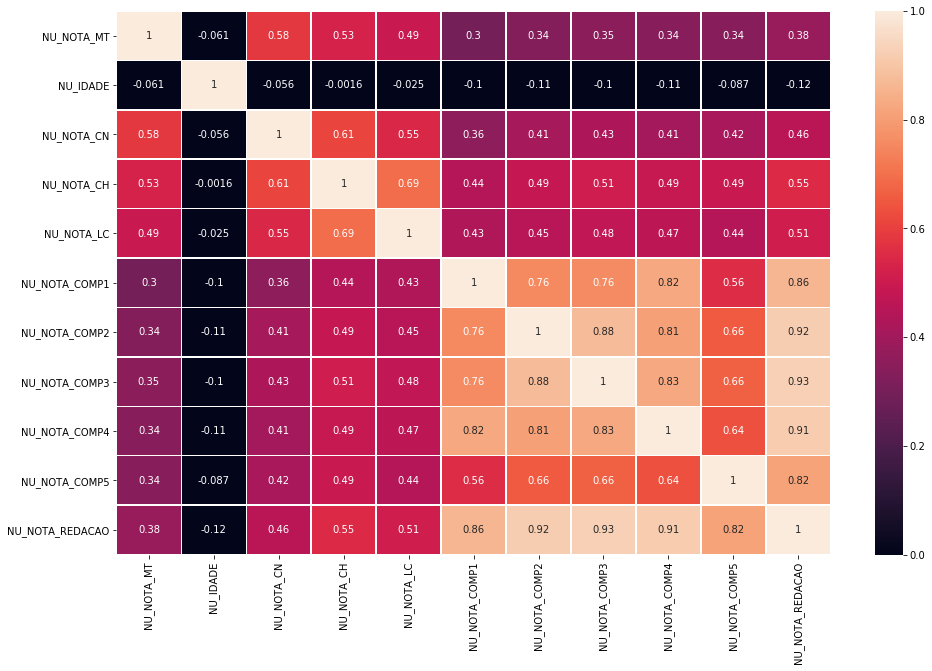

In [13]:
corr_final = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_final, vmin=0, vmax=1,linewidth=.5,annot=True)

# Preprocessamento

In [120]:
train1 = train.copy()
test1 = test.copy()

###### Retirar as notas zeros, representam uma parcela pifia do registros e vou considerar como outliers

fnotas =  ['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC']
for f in fnotas:
    train1 = train1[train1[f] != 0]

##### Inferir zero aos dados faltantes

In [121]:
train1 = train1.fillna(0)

In [122]:
train1.isnull().sum()

NU_NOTA_MT           0
SG_UF_RESIDENCIA     0
NU_IDADE             0
TP_SEXO              0
TP_COR_RACA          0
TP_NACIONALIDADE     0
TP_ST_CONCLUSAO      0
TP_ANO_CONCLUIU      0
TP_ESCOLA            0
IN_TREINEIRO         0
IN_BAIXA_VISAO       0
IN_CEGUEIRA          0
IN_SURDEZ            0
IN_DISLEXIA          0
IN_SABATISTA         0
IN_GESTANTE          0
IN_IDOSO             0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
CO_PROVA_CN          0
CO_PROVA_CH          0
CO_PROVA_LC          0
CO_PROVA_MT          0
NU_NOTA_CN           0
NU_NOTA_CH           0
NU_NOTA_LC           0
TP_LINGUA            0
TP_STATUS_REDACAO    0
NU_NOTA_COMP1        0
NU_NOTA_COMP2        0
NU_NOTA_COMP3        0
NU_NOTA_COMP4        0
NU_NOTA_COMP5        0
NU_NOTA_REDACAO      0
Q001                 0
Q002                 0
Q006                 0
Q024                 0
Q025                 0
Q026                 0
Q047                 0
dtype: int64

##### Crianção da media do primeiro fds da aula

In [123]:
train1['MEDIA_CN_CH'] = train1[['NU_NOTA_CN','NU_NOTA_CH']].mean(axis=1)

###### Drop da coluna TP_PRESENCA_CN porque tem a mesma informação da coluna TP_PRESENCA_CH

In [124]:
train1 = train1.drop(['TP_PRESENCA_CN'],axis=1)

##### Renomeando as colunas sobre presença em provas em presença no fds de provas

In [125]:
train1= train1.rename(columns={'TP_PRESENCA_CH': 'ZERO_CN_CH_POR_AUSENCIA','TP_PRESENCA_LC':'ZERO_LC_MT_POR_AUSENCIA'})

##### Tendo a vista que a nota da redação é a soma das competencias 1,2,3,4 e 5, vou retirar essas informações e trabalhar apenas com a nota da redação

In [126]:
train1 = train1.drop(['NU_NOTA_COMP1','NU_NOTA_COMP2',
                      'NU_NOTA_COMP3','NU_NOTA_COMP4', 'NU_NOTA_COMP5'],axis=1)

##### Retirando colunas com o codigo das provas, informacao administrativa

In [127]:
train1 = train1.drop(['CO_PROVA_CN','CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT'],axis=1)

##### Retirando os registros missing

In [128]:
train1 = train1.dropna()

In [129]:
train1.isnull().sum()

NU_NOTA_MT                 0
SG_UF_RESIDENCIA           0
NU_IDADE                   0
TP_SEXO                    0
TP_COR_RACA                0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
IN_TREINEIRO               0
IN_BAIXA_VISAO             0
IN_CEGUEIRA                0
IN_SURDEZ                  0
IN_DISLEXIA                0
IN_SABATISTA               0
IN_GESTANTE                0
IN_IDOSO                   0
ZERO_CN_CH_POR_AUSENCIA    0
ZERO_LC_MT_POR_AUSENCIA    0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q006                       0
Q024                       0
Q025                       0
Q026                       0
Q047                       0
MEDIA_CN_CH                0
dtype: int64

##### Heatmap de correlação retirando valores missing

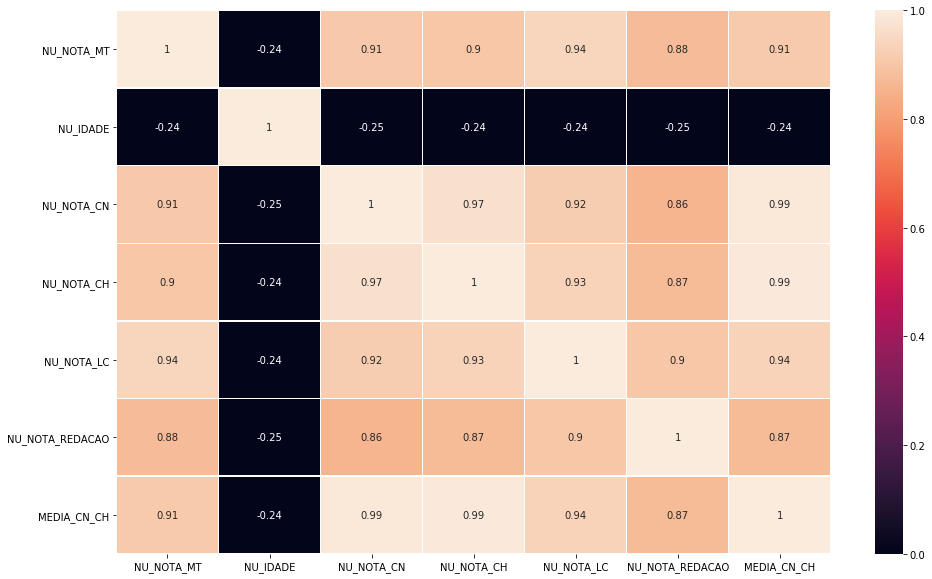

In [130]:
corr_final = train1.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_final, vmin=0, vmax=1,linewidth=.5,annot=True)

In [131]:
train1.ZERO_CN_CH_POR_AUSENCIA = train1.ZERO_CN_CH_POR_AUSENCIA.replace('1','NAO')
train1.ZERO_CN_CH_POR_AUSENCIA = train1.ZERO_CN_CH_POR_AUSENCIA.replace('0','SIM')

In [132]:
train1.ZERO_LC_MT_POR_AUSENCIA = train1.ZERO_LC_MT_POR_AUSENCIA.replace('1','NAO')
train1.ZERO_LC_MT_POR_AUSENCIA = train1.ZERO_LC_MT_POR_AUSENCIA.replace('0','SIM')

##### Separando features e target

In [133]:
features1 = train1.drop(['NU_NOTA_MT'],axis=1)
target_final = train1.NU_NOTA_MT

##### MinMaxScaler

In [134]:
features1.columns

Index(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'ZERO_CN_CH_POR_AUSENCIA', 'ZERO_LC_MT_POR_AUSENCIA', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q047', 'MEDIA_CN_CH'],
      dtype='object')

In [135]:
features_numericas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_REDACAO','MEDIA_CN_CH']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_minmax = pd.DataFrame(data=features1)
features_minmax[features_numericas] = scaler.fit_transform(features_minmax[features_numericas])

display(features_minmax.head())

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,...,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,MEDIA_CN_CH
0,RS,24.0,M,1,1,1,4,1,0,0,...,1.0,0.52,D,D,C,A,A,C,A,0.613768
1,CE,17.0,F,3,1,2,0,2,0,0,...,1.0,0.58,A,A,B,A,A,A,A,0.671014
2,CE,21.0,F,3,1,3,0,1,0,0,...,0,0.00,D,D,C,A,A,A,A,0.000000
3,RJ,25.0,F,0,1,1,9,1,0,0,...,0,0.00,H,E,E,C,B,C,D,0.000000
4,AM,28.0,M,2,1,1,4,1,0,0,...,0,0.00,E,D,C,A,A,B,A,0.000000


##### np.log

features_np = pd.DataFrame(data=features_minmax)
features_np[features_numericas] = np.log(features_minmax[features_numericas])

##### get_dummies

In [136]:
features_final = pd.get_dummies(features_minmax)
display(features_final.head())

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,MEDIA_CN_CH,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,24.0,0.541047,0.613879,0.761131,0.52,0.613768,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1,17.0,0.588418,0.674226,0.784442,0.58,0.671014,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,21.0,0.000000,0.000000,0.000000,0.00,0.000000,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,25.0,0.000000,0.000000,0.000000,0.00,0.000000,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,28.0,0.000000,0.000000,0.000000,0.00,0.000000,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0


##### Feature Selection

In [137]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif,k=130).fit(features_final,target_final)

results = pd.DataFrame({'Features':list(features_final.columns),"Scores":selector.scores_})
results.sort_values(by='Scores', ascending=False)

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [69] are constant.
  UserWarning)
C:\Users\lucaskenjis\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Features,Scores
84,ZERO_LC_MT_POR_AUSENCIA_NAO,804.099917
88,TP_STATUS_REDACAO_0,804.099917
85,ZERO_LC_MT_POR_AUSENCIA_SIM,535.321453
3,NU_NOTA_LC,90.610952
89,TP_STATUS_REDACAO_1.0,44.080543
81,ZERO_CN_CH_POR_AUSENCIA_NAO,26.836977
82,ZERO_CN_CH_POR_AUSENCIA_SIM,26.465818
5,MEDIA_CN_CH,24.080620
1,NU_NOTA_CN,22.226007
2,NU_NOTA_CH,22.120891


In [138]:
selected_features  = selector.transform(features_final)

In [139]:
selected_features 

array([[24.        ,  0.54104663,  0.61387856, ...,  0.        ,
         0.        ,  0.        ],
       [17.        ,  0.58841766,  0.67422553, ...,  0.        ,
         0.        ,  0.        ],
       [21.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [15.        ,  0.57105655,  0.65539033, ...,  0.        ,
         0.        ,  0.        ],
       [36.        ,  0.52393353,  0.77038414, ...,  0.        ,
         0.        ,  0.        ],
       [17.        ,  0.60602679,  0.71288724, ...,  0.        ,
         0.        ,  0.        ]])

##### Separar dados em treino e teste

In [140]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, 
                                                    target_final, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

## MODELO RandomForestRegressor

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [142]:
rfr = RandomForestRegressor(random_state = 101)
modelo_rfr = rfr.fit(X_train, y_train)

predict = modelo_rfr.predict(X_test)
print('MSE:', mean_squared_error(predict, y_test).round(8)) 

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE: 4208.04671311


## GRID_SEARCH

In [149]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [8, 10],
    'n_estimators': [100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 8,
 'n_estimators': 200}

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 8,
 'n_estimators': 200}

In [151]:
best_grid = grid_search.best_estimator_
pred = best_grid.predict(X_test)
print('MSE:', mean_squared_error(predict, y_test).round(8)) 

MSE: 3735.64631516


In [154]:
rfr = RandomForestRegressor(n_estimators= 200, min_samples_leaf =10 ,min_samples_split =8, max_depth = 10,random_state = 101)
modelo_rfr = rfr.fit(X_train, y_train)

predict = modelo_rfr.predict(X_test)
mse = mean_squared_error(predict, y_test)
print('MSE:', mse) 

MSE: 3734.96144391015


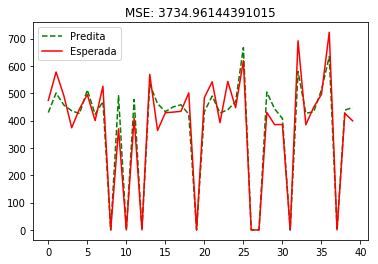

In [155]:
previsto = np.array(predict)
real = np.array(y_test)

y1 = predict[:40]
x1 = range(len(y1))
y2 = y_test[:40]
x2 = range(len(y2))

plt.title('MSE: {}'.format(mse))
plt.plot(x1,y1,color='green',linestyle='--',label='Predita')
plt.plot(x2,y2,color='red',linestyle='-', label = 'Esperada')
plt.legend()
plt.show()